In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import sklearn.preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn . preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import RidgeCV
from joblib import dump, load

In [325]:
#Reading the data
url = "/content/Advertising.csv"
df = pd.read_csv(url)

In [326]:
# Separating my data into features and labels 
x = df[["TV", "radio", "newspaper"]]
y = df["sales"]

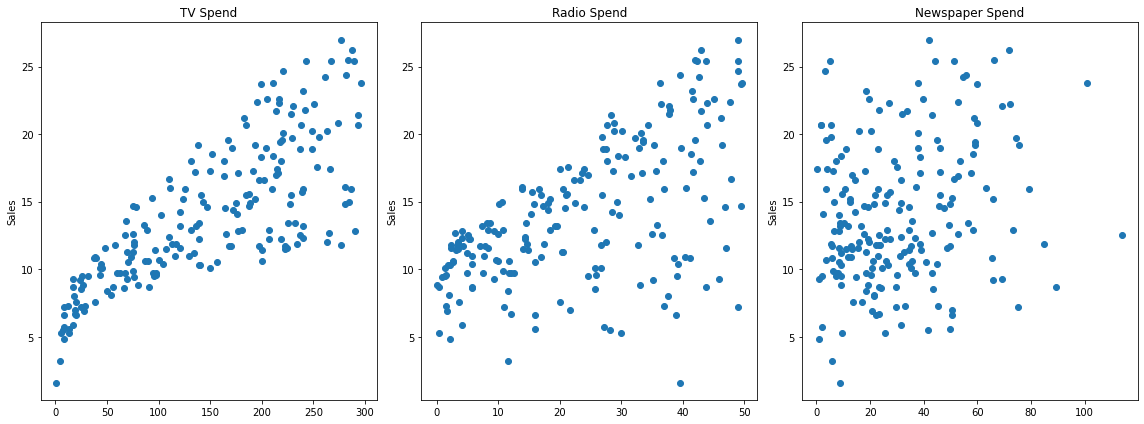

In [327]:
# Visualizing my data to understand it- the pattern, ...etc
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [328]:
# Creating an array to store the results in: 
train_array = []
test_array = []

In [329]:
#Polynomial Regression Model
for i in range (1 ,11):
 polynomial_converter = PolynomialFeatures(degree =i, include_bias=False)
 poly_features=polynomial_converter.fit(x)
 poly_features = polynomial_converter.transform(x)
 
 # Splitting the features and labels into train and test:
 x_train,x_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.3,random_state=101)

 # Scaling the data:
 scaler = StandardScaler()
 scaler.fit(x_train)
 x_train = scaler.transform(x_train) 
 x_test = scaler.transform(x_test)

 # Creating polynomial model: 
 p_model=LinearRegression()
 p_model.fit(x_train, y_train)
    
 #Predicting on both Train & Test Data:
 y_train_pred=p_model.predict(x_train)
 y_test_pred=p_model.predict(x_test)

 #RMSE of Train Set:
 train_RMSE=np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    
 #RMSE of Test Set:
 test_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    
 #Append the RMSE to the Train and Test List:
 train_array.append(train_RMSE)
 test_array.append(test_RMSE)

In [330]:
# Printing the test array to see results:
train_array

[1.7345941243293763,
 0.5879574085292231,
 0.43393443569020695,
 0.3517083688399352,
 0.25093429198022854,
 0.191858212601296,
 0.10560737751686627,
 7.81687591144987e-11,
 4.156819397330814e-11,
 1.8577725617391573e-11]

In [331]:
# Printing the test array to see results and choose the optimum degree:
test_array

[1.5161519375993888,
 0.664643175726899,
 0.5803286825159618,
 0.5077742639151808,
 2.575819749273849,
 7.228640132058262,
 113.14587027309705,
 1396.84517864148,
 2342.5369472204125,
 4195.2103532506635]

In [332]:
# Creating polynomial model
x=df.drop('sales',axis=1)
polynomial_featrues = PolynomialFeatures(4)
poly_model=polynomial_featrues.fit_transform(x)
y = df['sales']
x_train,x_test,y_train,y_test=train_test_split(poly_model,y,test_size=0.3,random_state=101)
scaler = StandardScaler ()
scaler . fit (x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)
polymodel=LinearRegression()
polymodel.fit(X_train, y_train)



LinearRegression()

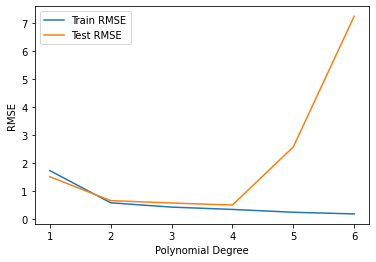

In [333]:
plt.plot(range(1,7), train_array[:6], label='Train RMSE')
plt.plot(range(1,7), test_array[:6], label='Test RMSE')
#howa elrasma di tabee3y?
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()

In [334]:
# Creating linear regression model
X = df.drop('sales',axis=1)
y = df['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)
Linear_regression = LinearRegression()
Linear_regression.fit(X_train,y_train)
Linear_predictions = Linear_regression.predict(X_test)

In [335]:
# Evaluating the model:
MSE = mean_squared_error(y_test,Linear_predictions)
RMSE = np.sqrt(MSE)
print(RMSE)

1.5161519375993884


In [336]:
# Creating Ridge Regression model
ridge_model=RidgeCV(alphas=(0.1, 1.0, 10.0))
ridge_model.fit(X_train,y_train)
predictions_ridge=ridge_model.predict(X_test)

In [337]:
# Evaluating the model:
MSE = mean_squared_error(y_test,predictions_ridge)
RMSE = np.sqrt(MSE)
print(RMSE)

1.516187568189912


In [338]:
#dump model-->ridge model
dump(ridge_model, 'ridge_model.joblib') 
#loading model-->ridge model
loaded_model = load('ridge_model.joblib')
#predicting the model on these pts-->ridge model
campaign = [[149,22,12]]
loaded_model.predict(campaign)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  "X does not have valid feature names, but"


array([13.93361695])

In [339]:
dump(Linear_regression, 'linear_model.joblib') 
#loading model-->linear model
loaded_model = load('linear_model.joblib')
#predicting the model on these pts-->linear model
campaign = [[149,22,12]]
loaded_model.predict(campaign)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([13.93380216])

In [340]:
dump(polynomial_featrues, 'optimal_polyreg_model.joblib') 
dump(polymodel, 'optimal_polyreg_model_2.joblib')
#loading model-->poly
loaded_model = load('optimal_polyreg_model.joblib')
loaded_model_2 = load('optimal_polyreg_model_2.joblib')

#predicting the model on these pts-->poly model
campaign = [[149,22,12]]
campaign_poly=loaded_model.transform(campaign)
polymodel.predict(campaign_poly) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


array([15890723.53330381])